In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

Saving Phishing_Email.csv to Phishing_Email.csv


In [ ]:
df=pd.read_csv('Phishing_Email.csv')
df.head()

In [ ]:
df.isna().sum()

In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.dropna(inplace=True,axis=0)

In [ ]:
df.isna().sum()

,0
Email Text,0
Email Type,0


In [ ]:
df.duplicated().sum()

1096

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17538 entries, 0 to 18648
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Email Text  17538 non-null  object
 1   Email Type  17538 non-null  object
dtypes: object(2)
memory usage: 411.0+ KB


In [ ]:
df.shape

(17538, 2)

In [ ]:
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [ ]:
df['Email Type'].value_counts()

,count
Email Type,
Safe Email,10980
Phishing Email,6558


Text(0, 0.5, 'count')

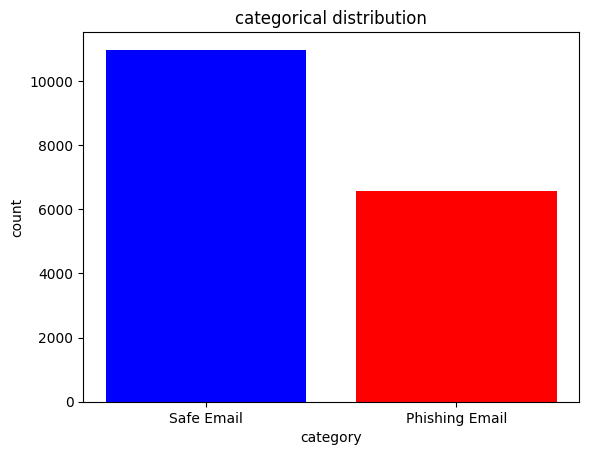

In [ ]:
index=df['Email Type'].value_counts().index
values=df['Email Type'].value_counts().values
plt.bar(index,values,color=['blue','red'])
plt.title('categorical distribution')
plt.xlabel('category')
plt.ylabel('count')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Email Type']=le.fit_transform(df['Email Type'])

In [ ]:
le.classes_

array(['Phishing Email', 'Safe Email'], dtype=object)

In [ ]:
df['Email Text'][0]

're : 6 . 1100 , disc : uniformitarianism , re : 1086 ; sex / lang dick hudson \'s observations on us use of \'s on \' but not \'d aughter \' as a vocative are very thought-provoking , but i am not sure that it is fair to attribute this to " sons " being " treated like senior relatives " . for one thing , we do n\'t normally use \' brother \' in this way any more than we do \'d aughter \' , and it is hard to imagine a natural class comprising senior relatives and \'s on \' but excluding \' brother \' . for another , there seem to me to be differences here . if i am not imagining a distinction that is not there , it seems to me that the senior relative terms are used in a wider variety of contexts , e . g . , calling out from a distance to get someone \'s attention , and hence at the beginning of an utterance , whereas \'s on \' seems more natural in utterances like \' yes , son \' , \' hand me that , son \' than in ones like \' son ! \' or \' son , help me ! \' ( although perhaps these

In [ ]:
df["Email Text"]=df["Email Text"].str.lower()
df["Email Text"].head()

,Email Text
0,"re : 6 . 1100 , disc : uniformitarianism , re ..."
1,the other side of * galicismos * * galicismo *...
2,re : equistar deal tickets are you still avail...
3,\nhello i am your hot lil horny toy.\n i am...
4,software at incredibly low prices ( 86 % lower...


In [ ]:
import string
# removing punctuation and other symbols
translator=str.maketrans('','',string.punctuation)
df["Email Text"]=df["Email Text"].apply(lambda x : x.translate(translator))
df["Email Text"].head()

,Email Text
0,re 6 1100 disc uniformitarianism re 1086...
1,the other side of galicismos galicismo is ...
2,re equistar deal tickets are you still availa...
3,\nhello i am your hot lil horny toy\n i am ...
4,software at incredibly low prices 86 lower ...


In [ ]:
# Removing hyperlinks, punctuations, extra space¶
import re
def preprocess_text(text):
    # Removing hyperlinks
    text = re.sub(r'http\S+', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df["Email Text"] =df["Email Text"].apply(preprocess_text)

In [ ]:
df["Email Text"].head()

,Email Text
0,re 6 1100 disc uniformitarianism re 1086 sex l...
1,the other side of galicismos galicismo is a sp...
2,re equistar deal tickets are you still availab...
3,hello i am your hot lil horny toy i am the one...
4,software at incredibly low prices 86 lower dra...


In [ ]:
df["Email Text"][0]

're 6 1100 disc uniformitarianism re 1086 sex lang dick hudson s observations on us use of s on but not d aughter as a vocative are very thoughtprovoking but i am not sure that it is fair to attribute this to sons being treated like senior relatives for one thing we do nt normally use brother in this way any more than we do d aughter and it is hard to imagine a natural class comprising senior relatives and s on but excluding brother for another there seem to me to be differences here if i am not imagining a distinction that is not there it seems to me that the senior relative terms are used in a wider variety of contexts e g calling out from a distance to get someone s attention and hence at the beginning of an utterance whereas s on seems more natural in utterances like yes son hand me that son than in ones like son or son help me although perhaps these latter ones are not completely impossible alexis mr'

In [ ]:
df.head() # safe - 1 , phishing - 0

,Email Text,Email Type
0,re 6 1100 disc uniformitarianism re 1086 sex l...,1
1,the other side of galicismos galicismo is a sp...,1
2,re equistar deal tickets are you still availab...,1
3,hello i am your hot lil horny toy i am the one...,0
4,software at incredibly low prices 86 lower dra...,0


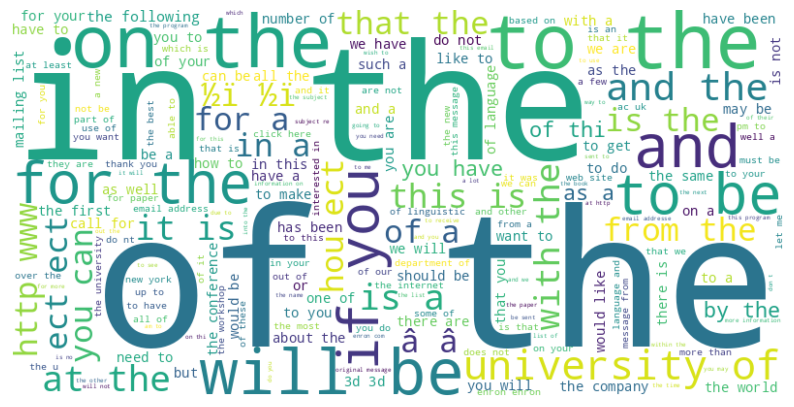

In [ ]:
# WordCloud of available stopwords
from wordcloud import WordCloud

#combining all rows into a single string
all_mails = " ".join(df['Email Text'])

#creating a wordcloud object
word_cloud = WordCloud(stopwords="english",width=800,height=400,background_color='white').generate(all_mails)

plt.figure(figsize=(10,6))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

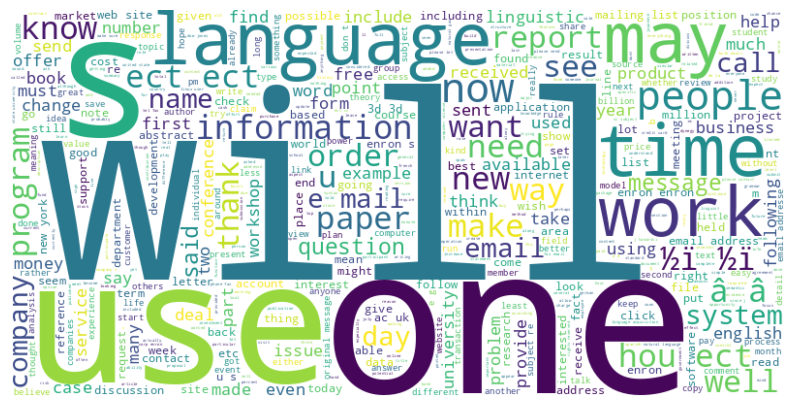

In [ ]:
# wordcloud of unique words
all_mails = " ".join(df['Email Text'])
word_cloud = WordCloud(width=800,height=400,background_color='white',max_words=10000).generate(all_mails)
plt.figure(figsize=(10,6))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df.head()

,Email Text,Email Type
0,re 6 1100 disc uniformitarianism re 1086 sex l...,1
1,the other side of galicismos galicismo is a sp...,1
2,re equistar deal tickets are you still availab...,1
3,hello i am your hot lil horny toy i am the one...,0
4,software at incredibly low prices 86 lower dra...,0


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
email_df=df.copy()

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words=set(stopwords.words('english'))
def tokenize_and_remove_stopwords(text):
    # tokenized the text
    tokens=word_tokenize(text)
    # removing stop words
    filtered_tokens=[word for word in tokens if word not in stop_words]
    return filtered_tokens
email_df['Email Text']=df['Email Text'].apply(tokenize_and_remove_stopwords)

In [ ]:
email_df['Email Text'].head()

,Email Text
0,"[6, 1100, disc, uniformitarianism, 1086, sex, ..."
1,"[side, galicismos, galicismo, spanish, term, n..."
2,"[equistar, deal, tickets, still, available, as..."
3,"[hello, hot, lil, horny, toy, one, dream, open..."
4,"[software, incredibly, low, prices, 86, lower,..."


In [ ]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
def stemm_the_data(data):
    return [ps.stem(word) for word in data]
stemmed_df=email_df.copy()
stemmed_df['Email Text']=email_df['Email Text'].apply(stemm_the_data)
stemmed_df['Email Text'].head()

,Email Text
0,"[6, 1100, disc, uniformitarian, 1086, sex, lan..."
1,"[side, galicismo, galicismo, spanish, term, na..."
2,"[equistar, deal, ticket, still, avail, assist,..."
3,"[hello, hot, lil, horni, toy, one, dream, open..."
4,"[softwar, incred, low, price, 86, lower, drape..."


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
def lemmatize_the_data(data):
    return [lemmatizer.lemmatize(word) for word in data]
lemmatized_df=email_df.copy()
lemmatized_df['Email Text']=lemmatized_df['Email Text'].apply(lemmatize_the_data)
lemmatized_df['Email Text'].head()

,Email Text
0,"[6, 1100, disc, uniformitarianism, 1086, sex, ..."
1,"[side, galicismos, galicismo, spanish, term, n..."
2,"[equistar, deal, ticket, still, available, ass..."
3,"[hello, hot, lil, horny, toy, one, dream, open..."
4,"[software, incredibly, low, price, 86, lower, ..."


In [ ]:
from gensim.models import Word2Vec
w2v_model=Word2Vec(sentences=lemmatized_df['Email Text'],vector_size=100,window=5,min_count=1,sg=1)

In [ ]:
w2v_model.wv['money']

array([-0.43893826,  0.9772578 , -0.34394777, -0.23708795,  0.2989675 ,
       -0.8623938 , -0.89435875,  1.1841124 ,  0.34617937, -0.95536435,
       -0.38755587, -0.72359705,  0.14830352, -0.46950597,  0.6221665 ,
        0.1124954 ,  0.45137987, -0.69277024,  0.7236409 , -0.7641907 ,
        0.0478024 ,  0.35708374, -0.0252549 , -0.80499876, -0.39175886,
        0.15706152, -0.4077044 , -0.08760779,  0.0475676 , -0.0792693 ,
        0.8779856 ,  0.3811993 , -0.10056128, -0.42930746, -0.45482156,
        0.40236226, -0.1479623 , -0.39757127, -0.7603798 , -1.0216943 ,
       -0.263882  , -0.12120039, -0.20588273, -0.05048636,  0.6564209 ,
       -0.8280818 , -0.04942406, -0.11167718,  0.37005666, -0.45490444,
        0.20784937,  0.00829646, -0.09981936,  0.22962447,  0.02841833,
        0.6309254 ,  0.509728  ,  0.01263218, -0.5684617 ,  0.36485165,
       -0.2708461 ,  0.5728327 , -0.21562408, -0.03809214, -0.5779166 ,
        0.17165945,  0.38369614,  0.23879299,  0.22384082,  0.20

In [ ]:
def get_average_embedding(words,model):
    embeddings=[model.wv[word] for word in words if word in model.wv]
    if embeddings:
        return np.mean(embeddings,axis=0)
    else:
        return np.zeros(model.vector_size)
lemmatized_df['avg_embedding']=lemmatized_df['Email Text'].apply(lambda words:get_average_embedding(words,w2v_model))

In [ ]:
lemmatized_df.head()

,Email Text,Email Type,avg_embedding
0,"[6, 1100, disc, uniformitarianism, 1086, sex, ...",1,"[-0.122531876, 0.27740845, 0.08133845, 0.06159..."
1,"[side, galicismos, galicismo, spanish, term, n...",1,"[-0.09485895, 0.19371544, 0.18336448, 0.062647..."
2,"[equistar, deal, ticket, still, available, ass...",1,"[-0.05186073, 0.044999406, -0.232675, -0.21698..."
3,"[hello, hot, lil, horny, toy, one, dream, open...",0,"[-0.049837776, 0.23498602, -0.19778728, 0.1085..."
4,"[software, incredibly, low, price, 86, lower, ...",0,"[-0.10681945, 0.2946255, 0.07375686, 0.0847823..."


In [ ]:
from sklearn.model_selection import train_test_split
X=np.vstack(lemmatized_df['avg_embedding'].values)
X

array([[-0.12253188,  0.27740845,  0.08133845, ..., -0.45857507,
         0.1516141 ,  0.18885382],
       [-0.09485895,  0.19371544,  0.18336448, ..., -0.52216524,
         0.07274569,  0.09704718],
       [-0.05186073,  0.04499941, -0.232675  , ..., -0.29550627,
         0.11902224,  0.28338268],
       ...,
       [-0.31344301,  0.1048061 , -0.3410697 , ..., -0.27925134,
         0.16567974,  0.02519076],
       [-0.25655839,  0.21935317, -0.18297309, ..., -0.38157508,
         0.21257684, -0.05601142],
       [-0.15211692,  0.21920198, -0.19157024, ..., -0.2463069 ,
         0.15912743, -0.00830664]])

In [ ]:
Y=lemmatized_df['Email Type']
Y.value_counts(normalize=True)

,proportion
Email Type,
1,0.626069
0,0.373931


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [ ]:
print('X train shape : ',X_train.shape)
print('Y train shape : ',Y_train.shape)
print('X test shape : ',X_test.shape)
print('Y test shape : ',Y_test.shape)

X train shape :  (14030, 100)
Y train shape :  (14030,)
X test shape :  (3508, 100)
Y test shape :  (3508,)


In [ ]:
Y_train.value_counts(normalize=True)

,proportion
Email Type,
1,0.626087
0,0.373913


In [ ]:
Y_test.value_counts(normalize=True)

,proportion
Email Type,
1,0.625998
0,0.374002


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,Y_train)
nb_y_predictions=nb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
nb_accuracy=accuracy_score(Y_test,nb_y_predictions)
nb_precision=precision_score(Y_test,nb_y_predictions)
nb_recall=recall_score(Y_test,nb_y_predictions)
nb_f1score=f1_score(Y_test,nb_y_predictions)
nb_auc_roc_score=roc_auc_score(Y_test,nb_y_predictions)
print('Model -  Naı¨ve Bayes:')
print(f'Accuracy score : {nb_accuracy}')
print(f'Recall score : {nb_recall}')
print(f'Precision score : {nb_precision}')
print(f'F1 score : {nb_f1score}')
print(f'ROC AUC score: {nb_auc_roc_score}')

Model -  Naı¨ve Bayes:
Accuracy score : 0.9153363740022805
Recall score : 0.8961748633879781
Precision score : 0.9661266568483063
F1 score : 0.9298369950389794
ROC AUC score: 0.9217916999866721


In [ ]:
print('classification report:')
print(classification_report(Y_test,nb_y_predictions))

classification report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      1312
           1       0.97      0.90      0.93      2196

    accuracy                           0.92      3508
   macro avg       0.91      0.92      0.91      3508
weighted avg       0.92      0.92      0.92      3508



Text(0.5, 1.0, 'confusion matrix using Naı¨ve Bayes')

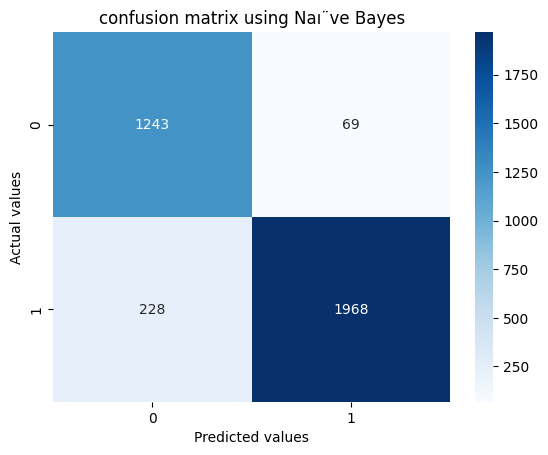

In [ ]:
cm=confusion_matrix(Y_test,nb_y_predictions)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('confusion matrix using Naı¨ve Bayes')

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=200,random_state=42)
lr.fit(X_train,Y_train)
lr_y_predictions=lr.predict(X_test)

In [ ]:
lr_accuracy=accuracy_score(Y_test,lr_y_predictions)
lr_precision=precision_score(Y_test,lr_y_predictions)
lr_recall=recall_score(Y_test,lr_y_predictions)
lr_f1score=f1_score(Y_test,lr_y_predictions)
lr_auc_roc_score=roc_auc_score(Y_test,lr_y_predictions)
print('Model -  Logistic Regression:')
print(f'Accuracy score : {lr_accuracy}')
print(f'Recall score : {lr_recall}')
print(f'Precision score : {lr_precision}')
print(f'F1 score : {lr_f1score}')
print(f'ROC AUC score: {lr_auc_roc_score}')

Model -  Logistic Regression:
Accuracy score : 0.9683580387685291
Recall score : 0.9685792349726776
Precision score : 0.9806362378976486
F1 score : 0.9745704467353952
ROC AUC score: 0.9682835199253632


In [ ]:
print('classification report:')
print(classification_report(Y_test,lr_y_predictions))

classification report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1312
           1       0.98      0.97      0.97      2196

    accuracy                           0.97      3508
   macro avg       0.96      0.97      0.97      3508
weighted avg       0.97      0.97      0.97      3508



Text(0.5, 1.0, 'confusion matrix using Logistic Regression')

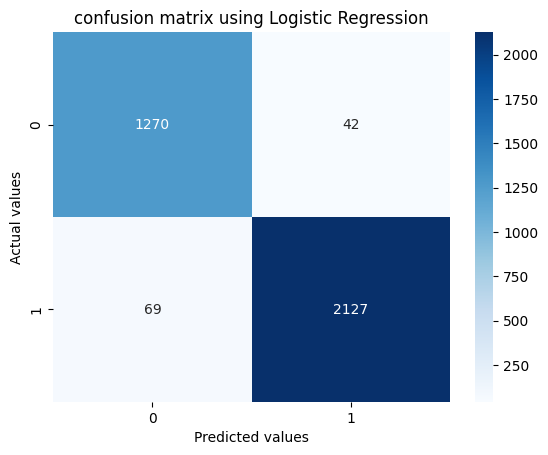

In [ ]:
cm=confusion_matrix(Y_test,lr_y_predictions)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('confusion matrix using Logistic Regression')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',max_features='sqrt',max_depth=15,n_estimators=50)

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf.fit(X_train,Y_train)
rf_y_predictions=rf.predict(X_test)
rf_accuracy=accuracy_score(Y_test,rf_y_predictions)
rf_precision=precision_score(Y_test,rf_y_predictions)
rf_recall=recall_score(Y_test,rf_y_predictions)
rf_f1score=f1_score(Y_test,rf_y_predictions)
rf_auc_roc_score=roc_auc_score(Y_test,rf_y_predictions)
print('Model -  Random Forest:')
print(f'Accuracy score : {rf_accuracy}')
print(f'Recall score : {rf_recall}')
print(f'Precision score : {rf_precision}')
print(f'F1 score : {rf_f1score}')
print(f'ROC AUC score: {rf_auc_roc_score}')

Model -  Random Forest:
Accuracy score : 0.9726339794754846
Recall score : 0.9776867030965392
Precision score : 0.9785779398359161
F1 score : 0.9781321184510251
ROC AUC score: 0.970931766182416


In [ ]:
print('classification report:')
print(classification_report(Y_test,rf_y_predictions))

classification report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1312
           1       0.98      0.98      0.98      2196

    accuracy                           0.97      3508
   macro avg       0.97      0.97      0.97      3508
weighted avg       0.97      0.97      0.97      3508



Text(0.5, 1.0, 'confusion matrix using Logistic Regression')

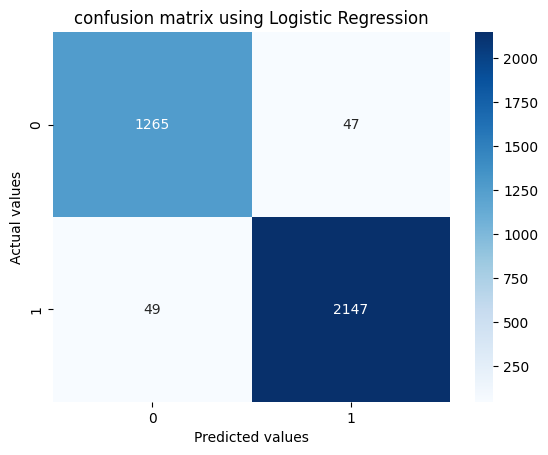

In [ ]:
cm=confusion_matrix(Y_test,rf_y_predictions)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('confusion matrix using Logistic Regression')

In [ ]:
from sklearn.svm import SVC
svm=SVC(random_state=42)
svm.fit(X_train,Y_train)

SVC(random_state=42)

In [ ]:
svm_y_predictions=svm.predict(X_test)
svm_accuracy=accuracy_score(Y_test,svm_y_predictions)
svm_precision=precision_score(Y_test,svm_y_predictions)
svm_recall=recall_score(Y_test,svm_y_predictions)
svm_f1score=f1_score(Y_test,svm_y_predictions)
svm_auc_roc_score=roc_auc_score(Y_test,svm_y_predictions)
print('Model -  Support Vector Machine:')
print(f'Accuracy score : {svm_accuracy}')
print(f'Recall score : {svm_recall}')
print(f'Precision score : {svm_precision}')
print(f'F1 score : {svm_f1score}')
print(f'ROC AUC score: {svm_auc_roc_score}')

Model -  Support Vector Machine:
Accuracy score : 0.9720638540478905
Recall score : 0.9740437158469946
Precision score : 0.9811926605504587
F1 score : 0.9776051188299817
ROC AUC score: 0.9713968579234973


In [ ]:
print('classification report:')
print(classification_report(Y_test,svm_y_predictions))

classification report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1312
           1       0.98      0.97      0.98      2196

    accuracy                           0.97      3508
   macro avg       0.97      0.97      0.97      3508
weighted avg       0.97      0.97      0.97      3508



Text(0.5, 1.0, 'confusion matrix using Logistic Regression')

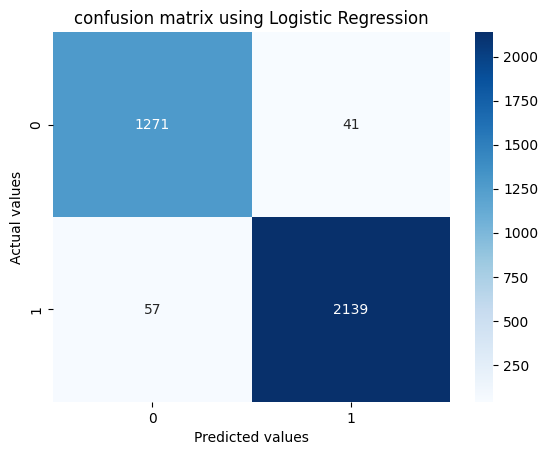

In [ ]:
cm=confusion_matrix(Y_test,svm_y_predictions)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('confusion matrix using Logistic Regression')